## Final Project - Diagnosis Diabetes with Classification Algorithms  - After Feature Engineering
#### Team members: Lin Xinyang (456220), Shivam Varshney (456533)

#### Project description:
In this project, we will use different machine learning algorithms to solve a classification problem -- diabetes diagnosis in the female group. The dataset we utilize is called "Pima Indians Diabetes Database" which includes eight essential diabetes indicators. It is originally from the National Institute of Diabetes and Digestive and Kidney Diseases Analytics Vidhya. We will encompass approximate six steps in this project, each of which plays a different role in deciphering the inherent patterns of the data selected. On top of that, we will measure performance of different models and give the award to the one with optimal predictive results. We sincerely hope this project can give you insight into machine learning's application in the real world. 

### Section one: import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
!pip install mlxtend
!pip install missingno
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
import warnings
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install xgboost
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import scipy.stats as stats
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
np.random.seed(123) 

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')

### Section two: data preprocessing

#### (1) Overall of the data

In [4]:
diabetes_df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

#### (2) Data Cleaning - handle missing values

In [5]:
print(diabetes_df.isnull().sum())
print(diabetes_df.info())
# Fortunately, the answer is no! But wait! Do you notice many zeros in columns called BloodPressure,SkinThickness,Insulin,BMI?
# These indicators cannot be zeors. Therefore, there are actually missing values in the dataset.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: 

In [6]:
# Replace missing values with column medians
diabetes_df_copy = diabetes_df.copy(deep = True)
columns_median=np.array([np.median(diabetes_df_copy["Glucose"]),
                         np.median(diabetes_df_copy["BloodPressure"]),
                         np.median(diabetes_df_copy["SkinThickness"]),
                        np.median(diabetes_df_copy["Insulin"]),
                         np.median(diabetes_df_copy["BMI"])])

diabetes_df_copy.loc[diabetes_df_copy["Glucose"]==0,"Glucose"]= columns_median[0]
diabetes_df_copy.loc[diabetes_df_copy["BloodPressure"]==0,"BloodPressure"]= columns_median[1]
diabetes_df_copy.loc[diabetes_df_copy["SkinThickness"]==0,"SkinThickness"]= columns_median[2]
diabetes_df_copy.loc[diabetes_df_copy["Insulin"]==0,"Insulin"]= columns_median[3]
diabetes_df_copy.loc[diabetes_df_copy["BMI"]==0,"BMI"]= columns_median[4]

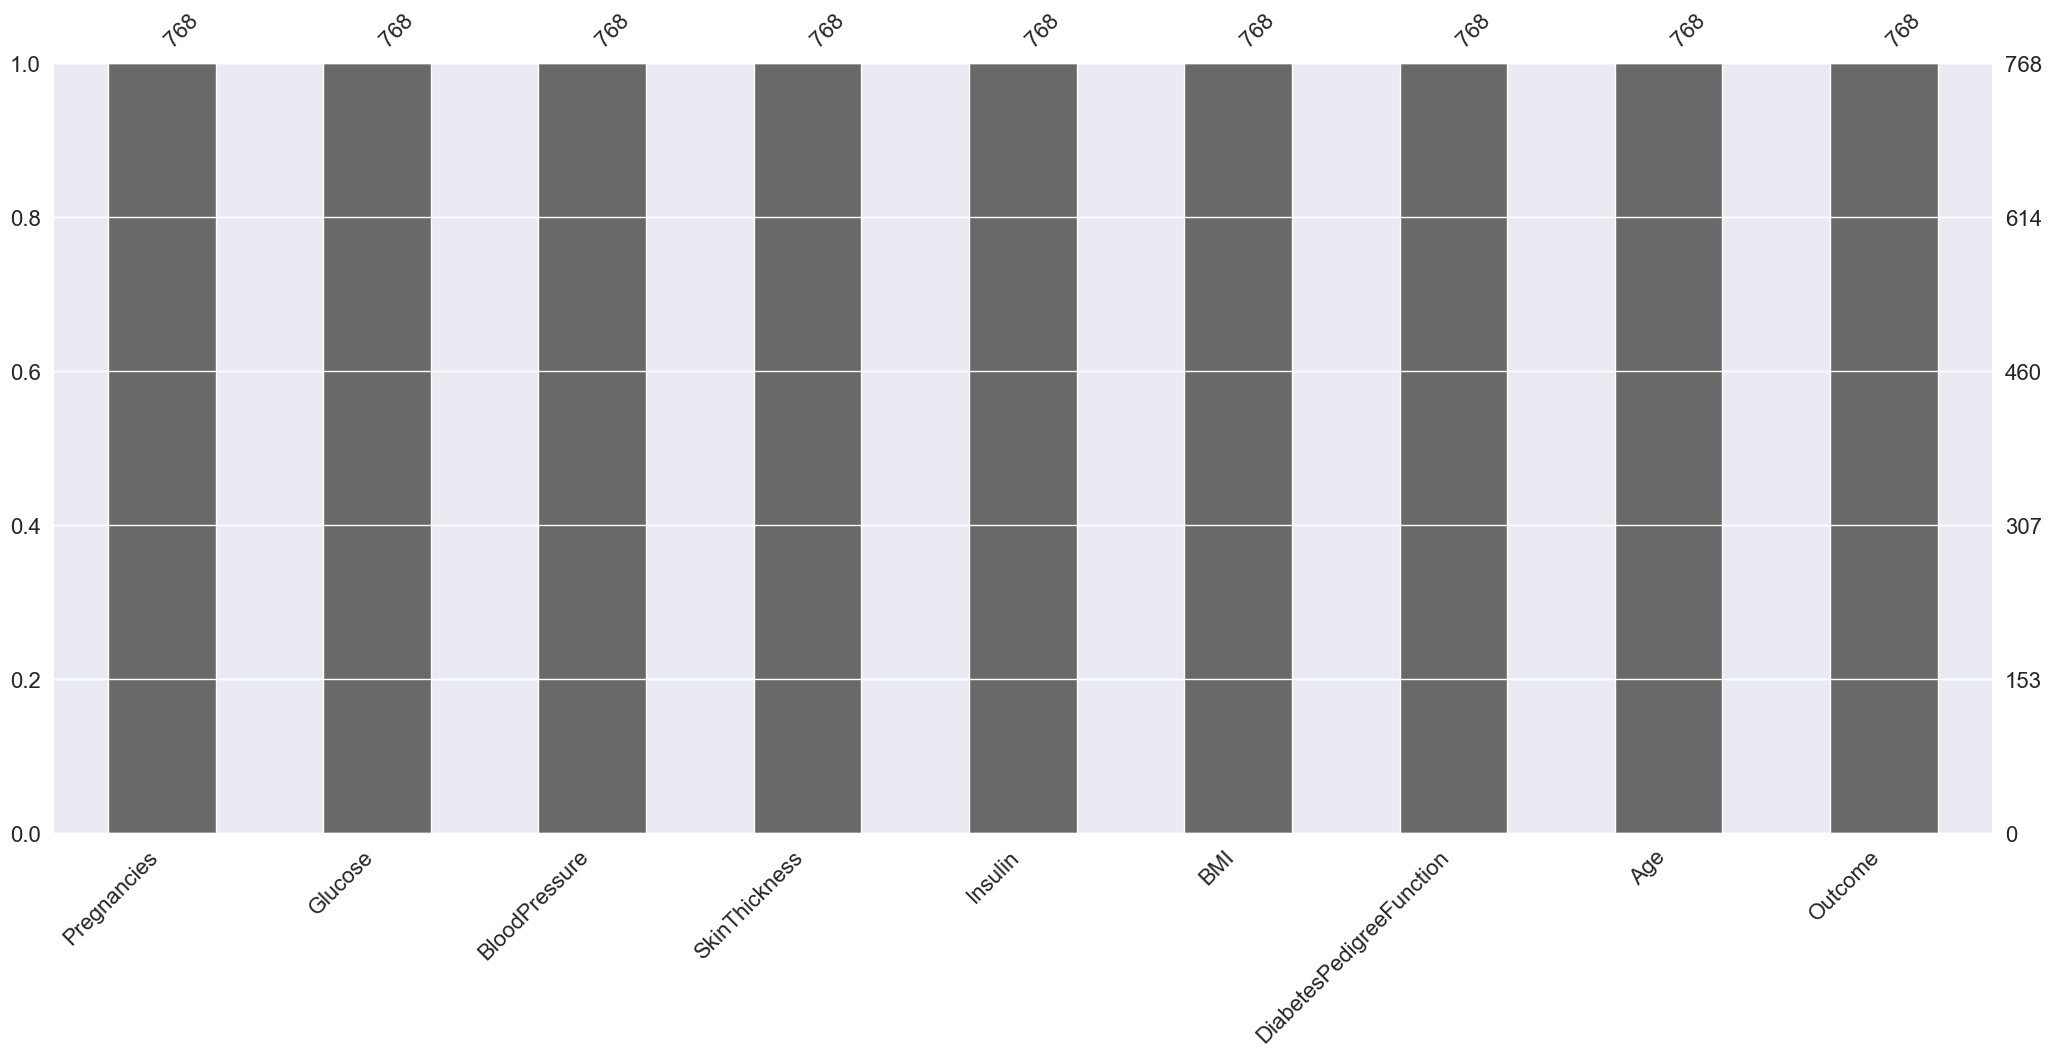

In [7]:
#Plotting Null Count Analysis Plot
p = msno.bar(diabetes_df_copy)

#### (3) Data engineering

In [8]:
# Feature Engineering
# 1. BMI as a Range
diabetes_df_copy['BMI_Category'] = pd.cut(diabetes_df_copy['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf],
                                     labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])

# 2. Interaction Term: Glucose * Insulin
diabetes_df_copy['Glucose_Insulin_Interact'] = diabetes_df_copy['Glucose'] * diabetes_df_copy['Insulin']

# 3. Age Groups
diabetes_df_copy['Age_Group'] = pd.cut(diabetes_df_copy['Age'], bins=[20, 30, 40, 50, 60, 70, np.inf],
                                 labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70+'])
diabetes_df_copy

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome   BMI_Category  \
0                       0.627   50        1        Obese I   
1                       0.351   31        0     Overweight   
2                       0.672   32        1  Normal Weight   
3                       0.167   21        0     Overweight   
4                       2.288   33        1      Obese III   
..                        ...  ...      ...            ...   
763                     0.171   63        0        Obese I   
764                     0.340   27        0       Obese II   
765                     0.245   30        0     Overweight   
766                     0.349   47        1        Obese I   
767                     0.315   23        0        Obese I   

     Glucose_Insulin_Interact Age_Group  
0                      4514.0     40-50  
1                      2592.5     30-40  
2                      5581.5     30-40  
3                      8366.0     20-30  
4                     23016.0     30-40  
..                        ...       ...  
763                   18180.0     60-70  
764                    3721.0     20-30  
765                   13552.0     20-30  
766                    3843.0     40-50  
767                    2836.5     20-30  

[768 rows x 12 columns]

#### (3) Statistical description

In [9]:
diabetes_df_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  768.000000                768.000000  768.000000  768.000000   
mean    32.450911                  0.471876   33.240885    0.348958   
std      6.875366                  0.331329   11.760232    0.476951   
min     18.200000                  0.078000   21.000000    0.000000   
25%     27.500000                  0.243750   24.000000    0.000000   
50%     32.000000                  0.372500   29.000000    0.000000   
75%     36.600000                  0.626250   41.000000    1.000000   
max     67.100000                  2.420000   81.000000    1.000000   

       Glucose_Insulin_Interact  
count                768.000000  
mean               12662.323568  
std                17391.701511  
min                 1020.000000  
25%                 3446.500000  
50%                 4985.750000  
75%                15867.500000  
max               159894.000000

### Section three: Data visualization

In this section, we will visualize features in the dataset, and in the whole process, we may also perform feature selection and data scaling.

#### (1) Histgram: distribution of each feature

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>],
       [<Axes: title={'center': 'Glucose_Insulin_Interact'}>, <Axes: >,
        <Axes: >]], dtype=object)

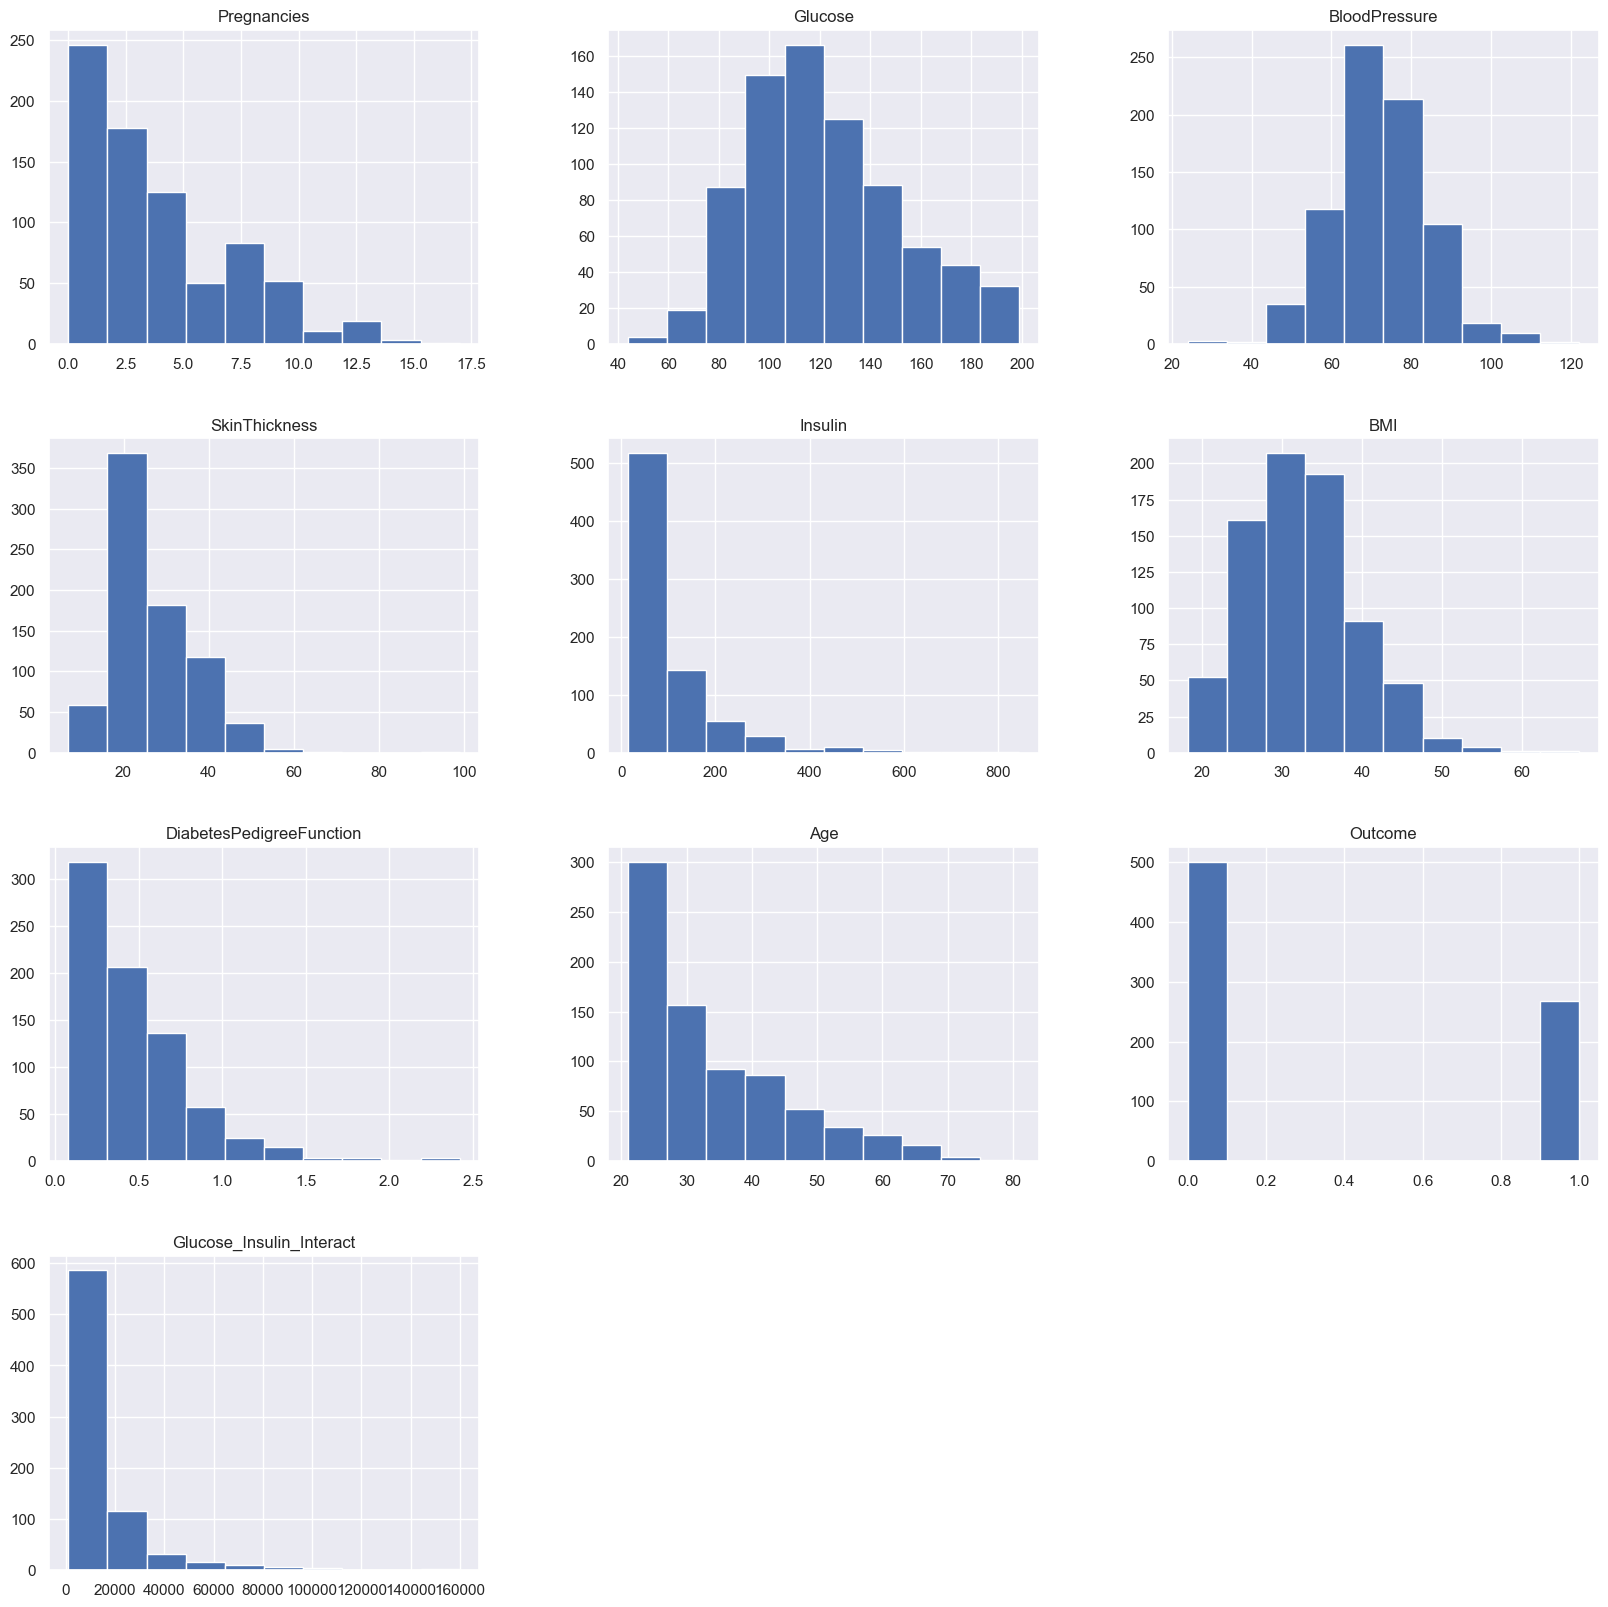

In [10]:
diabetes_df_copy.hist(figsize = (20,20))

#### Inference:
(1) Only Glucose, BloodPressure, BMI seem to follow Gaussian distribution. The rest of features are left skewed. 

(2) Most women are pregnant fewer than five times. Their glucose level concentrates between 75 and 150. Most of their blood pressure is around 60 t0 80. Insulin level between 0 and 100 stands out. BMI from 30 to 40 is a good representative of this group (A person can be considered obese if his/her BMI is higher than 30, which is the international standard). A very large number of them age between 20 to 30.

#### (2) QQ plot: examination of Gaussian distribution

In [11]:
feature_names = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age", "Outcome"
]

indices=[0,2,3,4,5,6,7,8]

fig,axes=plt.subplots(2,4,figsize=(15,8))
axes=axes.flatten()
for i,index in enumerate(indices):
    ax=axes[i]
    stats.probplot(diabetes_df_copy.iloc[:, index], dist="norm", plot=ax)
    ax.set_title("")
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel("")
plt.show()

#### Inference:
Based on QQ plots above, we could observe that Glucose, Blood pressure and Insulin are mostly likely to follow normal distribution. Regarding the rest features, there exists obvious deviation from the red line in the beginning and tail. 

#### (3) Heatmap: correlation between features--feature selection

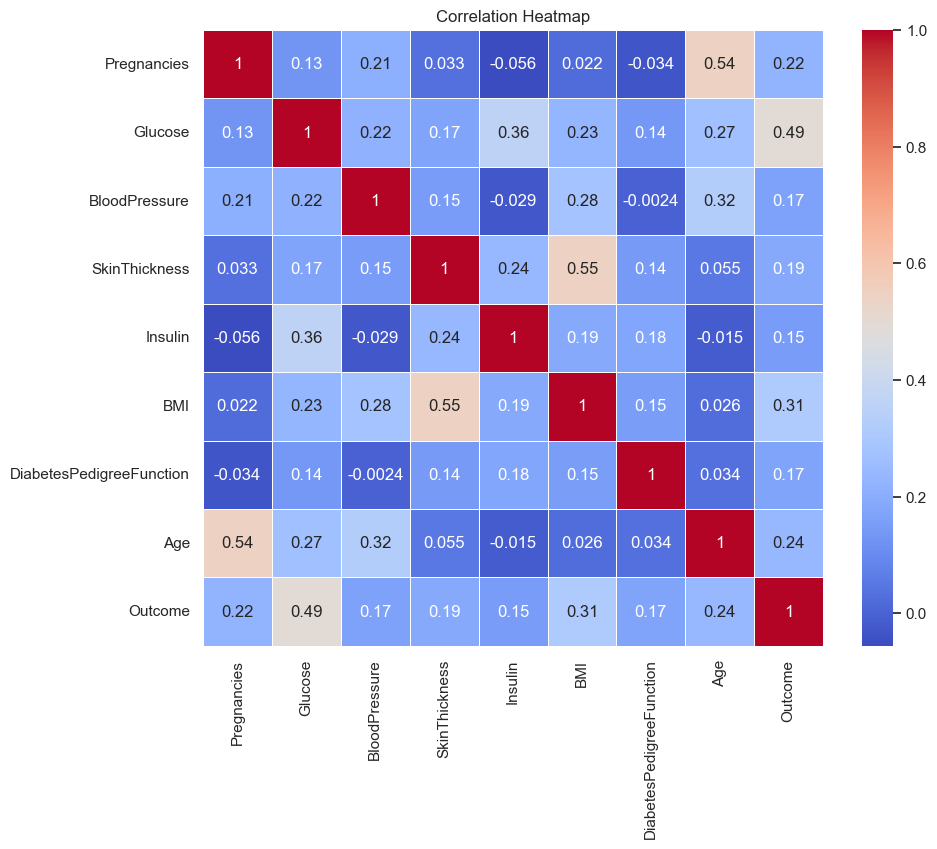

In [12]:
# Correlation heatmap
df = diabetes_df_copy.copy()  # If needed, create a copy of the DataFrame
x_labels=["Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age", "Outcome"
]
correlation_matrix = df[["Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age", "Outcome"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, xticklabels=x_labels, yticklabels=x_labels)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Correlation coefficient between explanatory variables and the output:
corrcoef_dict = {}
features = diabetes_df_copy[["Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age", "Outcome"]].shape[1]

feature_names = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age", "Outcome"
]

for j in range(features):
    coreffi = np.corrcoef(diabetes_df_copy.iloc[:, j], diabetes_df_copy['Outcome'])
    corrcoef_dict[feature_names[j]] = coreffi

print(f"The correlation coefficient between each feature and the target: {corrcoef_dict}")

The correlation coefficient between each feature and the target: {'Pregnancies': array([[1.        , 0.22189815],
       [0.22189815, 1.        ]]), 'Glucose': array([[1.       , 0.4927824],
       [0.4927824, 1.       ]]), 'BloodPressure': array([[1.        , 0.16572291],
       [0.16572291, 1.        ]]), 'SkinThickness': array([[1.        , 0.18906542],
       [0.18906542, 1.        ]]), 'Insulin': array([[1.        , 0.14845724],
       [0.14845724, 1.        ]]), 'BMI': array([[1.        , 0.31224903],
       [0.31224903, 1.        ]]), 'DiabetesPedigreeFunction': array([[1.        , 0.17384407],
       [0.17384407, 1.        ]]), 'Age': array([[1.        , 0.23835598],
       [0.23835598, 1.        ]]), 'Outcome': array([[1., 1.],
       [1., 1.]])}


#### Inference:
It seems that all these features make certain contribution to the outcomes, so let's not remove any of them.

#### (4) Bar chart: balance of outcomes, BMI_Category and outcomes

Outcome
0    500
1    268
Name: count, dtype: int64


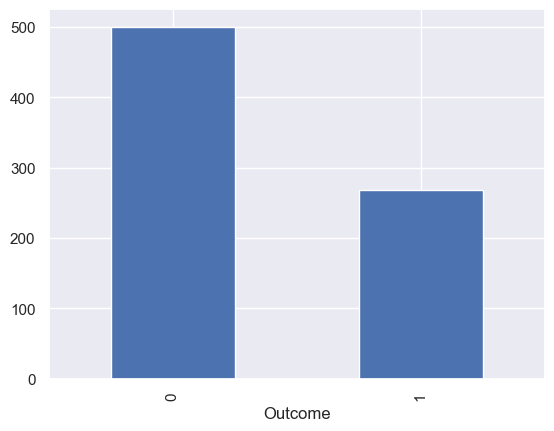

In [14]:
#Now, let’s check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df_copy["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df_copy.Outcome.value_counts())
p=diabetes_df_copy.Outcome.value_counts().plot(kind="bar")

In [15]:
# Visualizing the new feature
plt.figure(figsize=(8, 6))
sns.countplot(x='BMI_Category', hue='Outcome', data=diabetes_df_copy)
plt.title('BMI Category Distribution by Outcome')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

#### Inference: 
Here from the above visualization it is clearly visible that our dataset is imbalanced due to the fact that the number of patients who are diabetic is half of the patients who are non-diabetic. Moreover, the higher the BMI, the more likely that one will suffer from diabetes.

#### (5) Box plot: check outliers

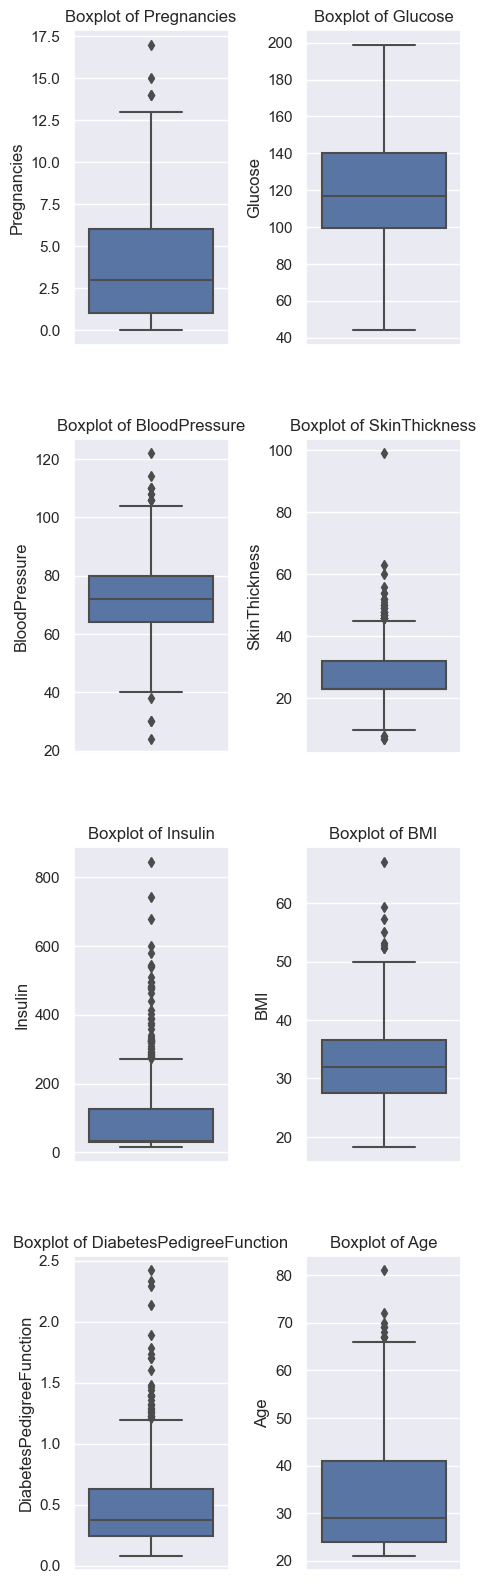

In [16]:
diabete_features=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

fig,axes=plt.subplots(4,2,figsize=(5,20))
axes=axes.flatten()
plt.subplots_adjust(wspace=0.5,hspace=0.3)
for i,feature in enumerate(diabete_features):
    sns.boxplot(y=diabetes_df_copy[feature],ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")
plt.show()

#### Inference:
Glucose is the only feature that doesn't have outliers

#### (4) Scaling the Data

In [18]:
# Feature Scaling
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age', 'Glucose_Insulin_Interact']
scaling_columns = numerical_columns.copy()  # Copy the list for scaling

sc_X = StandardScaler()
diabetes_scaled = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy[scaling_columns]),
                               columns=scaling_columns,
                               index=diabetes_df_copy.index)

# Add the 'BMI_Category' column
diabetes_scaled['BMI_Category'] = diabetes_df_copy['BMI_Category']

# Add the 'Age_Group' column
diabetes_scaled['Age_Group'] = diabetes_df_copy['Age_Group']

# Add column 'Outcome'
diabetes_scaled['Outcome'] = diabetes_df['Outcome']

print(diabetes_scaled.head(10))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.831114 -0.608201  0.167240   
1    -0.844885 -1.205066      -0.528319       0.180566 -0.608201 -0.851551   
2     1.233880  2.016662      -0.693761      -0.469981 -0.608201 -1.331838   
3    -0.844885 -1.073567      -0.528319      -0.469981 -0.006185 -0.633239   
4    -1.141852  0.504422      -2.679076       0.831114  0.695378  1.549885   
5     0.342981 -0.185948       0.133453      -0.469981 -0.608201 -0.997092   
6    -0.250952 -1.435189      -1.851862       0.505840 -0.063068 -0.211168   
7     1.827813 -0.218823      -0.031990      -0.469981 -0.608201  0.414661   
8    -0.547919  2.476909      -0.197433       1.915359  4.250593 -0.283939   
9     1.233880  0.109925       1.953325      -0.469981 -0.608201 -0.065626   

   DiabetesPedigreeFunction       Age  Glucose_Insulin_Interact  \
0                  0.468492  1.425995                 -0.468823   
1      

The data has been successfully scaled, transforming the features to a comparable range. This ensures that each feature contributes uniformly to the model, preventing dominance by variables with larger scales and facilitating more effective machine learning model training and evaluation.

### Section four: building models

In this section, we will build Logistic Regression, Decision Trees, Random Forest, AdaBoost, XGBoost and Support Vector Machine to make prediction 

#### (1) Logistic Regression

In [19]:
# One-hot encode categorical variables
diabetes_scaled = pd.get_dummies(diabetes_scaled, columns=['BMI_Category', 'Age_Group'], drop_first=True)

# Logistic Regression

X_lr = diabetes_scaled[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                        'DiabetesPedigreeFunction', 'Age', 'Glucose_Insulin_Interact',
                        'BMI_Category_Normal Weight', 'BMI_Category_Overweight', 'BMI_Category_Obese I',
                        'BMI_Category_Obese II', 'BMI_Category_Obese III',
                        'Age_Group_30-40', 'Age_Group_40-50', 'Age_Group_50-60', 'Age_Group_60-70', 'Age_Group_70+']]
y_lr = diabetes_scaled[['Outcome']]

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

model_lr = LogisticRegression(penalty="l2", max_iter=100, solver="lbfgs", random_state=42)
model_lr.fit(X_train_lr, y_train_lr.values.ravel())
y_estimated_lr = model_lr.predict(X_test_lr)

print("Logistic Regression:")
print("Accuracy: ", accuracy_score(y_test_lr, y_estimated_lr))
print("\nConfusion Matrix: ", confusion_matrix(y_test_lr, y_estimated_lr))
print("\nClassification report: ", classification_report(y_test_lr, y_estimated_lr))

Logistic Regression:
Accuracy:  0.7662337662337663

Confusion Matrix:  [[83 16]
 [20 35]]

Classification report:                precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



#### (2) Random Forests

In [20]:
n_estimators_rf = [20, 30, 40, 50, 70, 80, 90, 100, 120]
max_depth_rf = np.arange(10, 30)
accuracy_matrix_rf = np.zeros([len(n_estimators_rf), len(max_depth_rf)])

for i, estimator in enumerate(n_estimators_rf):
    for j, depth in enumerate(max_depth_rf):
        rf_model = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=42)
        rf_model.fit(X_train_lr, y_train_lr.values.ravel())
        y_estimated_rf = rf_model.predict(X_test_lr)
        accuracy_matrix_rf[i, j] = accuracy_score(y_test_lr, y_estimated_rf)

best_accuracy_rf = np.max(accuracy_matrix_rf)
best_params_rf = np.unravel_index(np.argmax(accuracy_matrix_rf), accuracy_matrix_rf.shape)
best_n_estimators_rf = n_estimators_rf[best_params_rf[0]]
best_max_depth_rf = max_depth_rf[best_params_rf[1]]

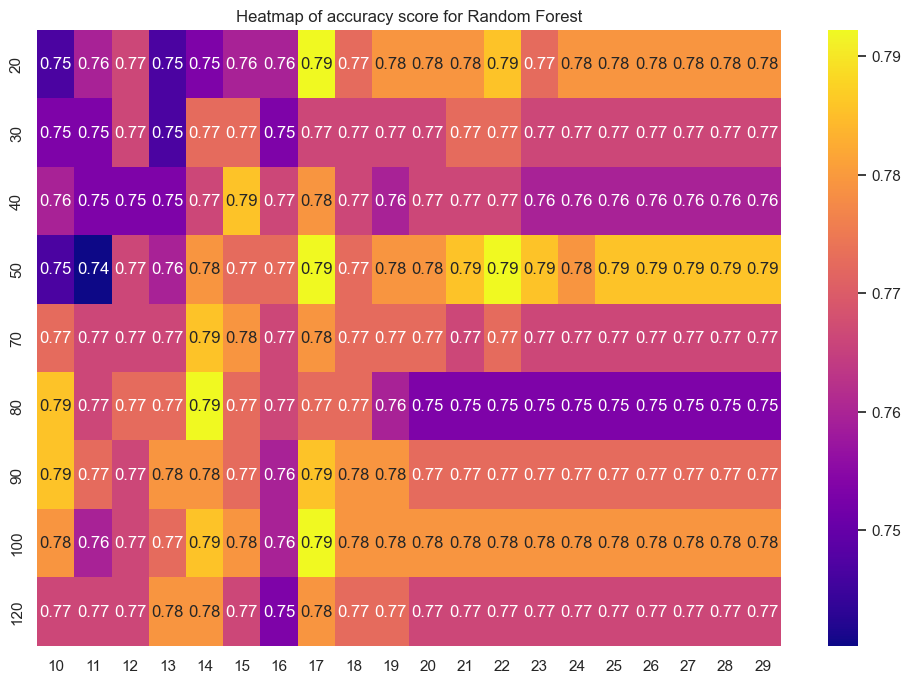

The best Random Forest model can be produced when n_estimators is 20 and max_depth is 17. The accuracy score in this case is 0.7922077922077922


In [21]:
# Plot heatmap for Random Forest accuracy_matrix_rf

plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_matrix_rf, cmap="plasma", annot=True, xticklabels=max_depth_rf, yticklabels=n_estimators_rf)
plt.title("Heatmap of accuracy score for Random Forest")
plt.show()

# Identify the best parameters
best_accuracy_rf = np.max(accuracy_matrix_rf)
best_params_rf = np.unravel_index(np.argmax(accuracy_matrix_rf), accuracy_matrix_rf.shape)
best_n_estimators_rf = n_estimators_rf[best_params_rf[0]]
best_max_depth_rf = max_depth_rf[best_params_rf[1]]

print(f"The best Random Forest model can be produced when n_estimators is {best_n_estimators_rf} and max_depth is {best_max_depth_rf}. The accuracy score in this case is {best_accuracy_rf}")


<Axes: >

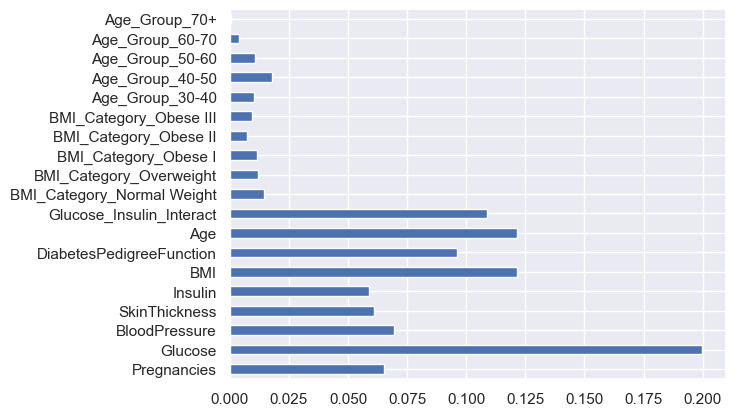

In [22]:
# Let's also check feature importance
rf_model.feature_importances_
(pd.Series(rf_model.feature_importances_, index=X_train_lr.columns).plot(kind='barh'))

#### Inference:
Top features in terms of their importance: Glucose, Age, BMI, Glucose_insulin_interact

#### (3) AdaBoost Classifier

In [23]:
# AdaBoost Grid Search

base_classifier = DecisionTreeClassifier(max_depth=2)
n_estimators_ab = [20, 30, 40, 50, 70, 80, 90, 100, 120]
learning_rate_ab = [0.01, 0.02, 0.05, 0.1, 1]
accuracy_matrix_ab = np.zeros([len(n_estimators_ab), len(learning_rate_ab)])

for i, estimator in enumerate(n_estimators_ab):
    for j, rate in enumerate(learning_rate_ab):
        adaboost_class = AdaBoostClassifier(base_estimator=base_classifier,
                                           n_estimators=estimator,
                                           learning_rate=rate,
                                           random_state=42)
        adaboost_class.fit(X_train_lr, y_train_lr.values.ravel())
        y_estimated_ab = adaboost_class.predict(X_test_lr)
        accuracy_matrix_ab[i, j] = accuracy_score(y_test_lr, y_estimated_ab)

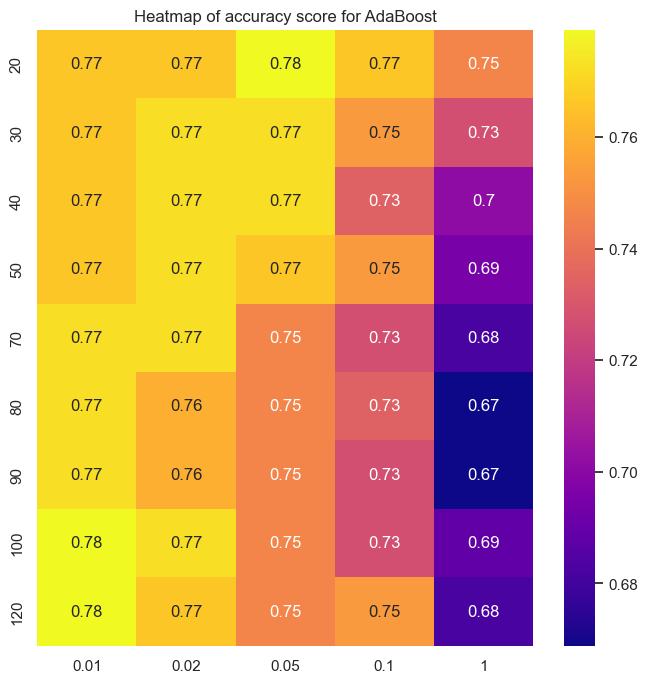

The best AdaBoost model can be produced when n_estimators is 20 and learning_rate is 0.05. The accuracy score in this case is 0.7792207792207793


In [33]:
# Plot heatmap for AdaBoost accuracy_matrix_a
plt.figure(figsize=(8, 8))
sns.heatmap(accuracy_matrix_ab, cmap="plasma", annot=True, xticklabels=learning_rate_ab, yticklabels=n_estimators_ab)
plt.title("Heatmap of accuracy score for AdaBoost")
plt.show()

# Identify the best parameters
best_accuracy_ab = np.max(accuracy_matrix_ab)
best_params_ab = np.unravel_index(np.argmax(accuracy_matrix_ab), accuracy_matrix_ab.shape)
best_n_estimators_ab = n_estimators_ab[best_params_ab[0]]
best_learning_rate_ab = learning_rate_ab[best_params_ab[1]]

print(f"The best AdaBoost model can be produced when n_estimators is {best_n_estimators_ab} and learning_rate is {best_learning_rate_ab}. The accuracy score in this case is {best_accuracy_ab}")


<Axes: >

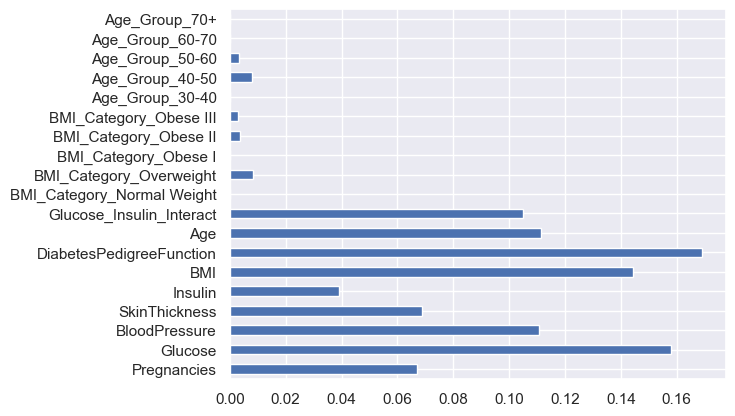

In [24]:
# let's check importance of each feature
adaboost_class.feature_importances_
(pd.Series(adaboost_class.feature_importances_, index=X_train_lr.columns).plot(kind='barh'))

# Features that make most contributions are DiabetesPedigreeFunction, Glucose, BMI, Age, BloodPressure.

#### (4) XGBoost Classifer

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# XGBoost Grid Search
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

grid_search_xgb = GridSearchCV(xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_lr, y_train_lr.values.ravel())

# Print best parameters and corresponding accuracy
best_params_xgb = grid_search_xgb.best_params_
best_accuracy_xgb = grid_search_xgb.best_score_

print("Best XGBoost model parameters:")
print(best_params_xgb)
print(f"The best XGBoost model accuracy is {best_accuracy_xgb}")

Best XGBoost model parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
The best XGBoost model accuracy is 0.783379981340797


In [26]:
# let's also create accuracy matrix
accuracy_matrix_xgb = np.array(grid_search_xgb.cv_results_['mean_test_score']).reshape(len(param_grid_xgb['n_estimators']), -1)
print(accuracy_matrix_xgb)

[[0.70030654 0.70683727 0.75737705 0.73779821 0.76871918 0.7622551
  0.70686392 0.7100893  0.76060243 0.74435559 0.76222844 0.7605891
  0.71338131 0.7198454  0.75409836 0.73775823 0.76544049 0.74919366
  0.78175397 0.78010129 0.76871918 0.76220179 0.75731041 0.7638278
  0.75731041 0.7703452  0.77361056 0.76378782 0.75893643 0.77031854
  0.75572438 0.75888311 0.75732374 0.76867919 0.75408503 0.76705318]
 [0.75893643 0.76707983 0.76545382 0.76871918 0.76218846 0.75565774
  0.76222844 0.75729708 0.75896308 0.76381447 0.75241903 0.74260962
  0.75728375 0.76057577 0.75403172 0.76546715 0.75404505 0.75893643
  0.70848994 0.72311076 0.76222844 0.75087298 0.77359723 0.7654938
  0.7117553  0.71824603 0.75733707 0.74270292 0.76869252 0.75572438
  0.71339464 0.72152472 0.7605891  0.73451953 0.76869252 0.74594162]
 [0.78337998 0.77527656 0.76548047 0.77198454 0.76221511 0.76380115
  0.76709316 0.76709316 0.76057577 0.77031854 0.76545382 0.76705318
  0.7621618  0.75728375 0.76381447 0.75732374 0.76

#### Now we will be making the predictions on the testing data directly as it is of more importance.



#### (5) SVM

In [28]:
from sklearn.svm import SVC

# SVM Grid Search with Reduced Space

param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
}

svm_model = SVC(random_state=42)

# Reduce data size for faster training (optional)
X_train_subset = X_train_lr.sample(frac=0.2, random_state=42)
y_train_subset = y_train_lr.loc[X_train_subset.index]

grid_search_svm = GridSearchCV(svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_subset, y_train_subset.values.ravel())

# Print best parameters and corresponding accuracy
best_params_svm = grid_search_svm.best_params_
best_accuracy_svm = grid_search_svm.best_score_

print("Best SVM model parameters:")
print(best_params_svm)
print(f"The best SVM model accuracy is {best_accuracy_svm}")

Best SVM model parameters:
{'C': 0.1, 'kernel': 'linear'}
The best SVM model accuracy is 0.8123333333333335


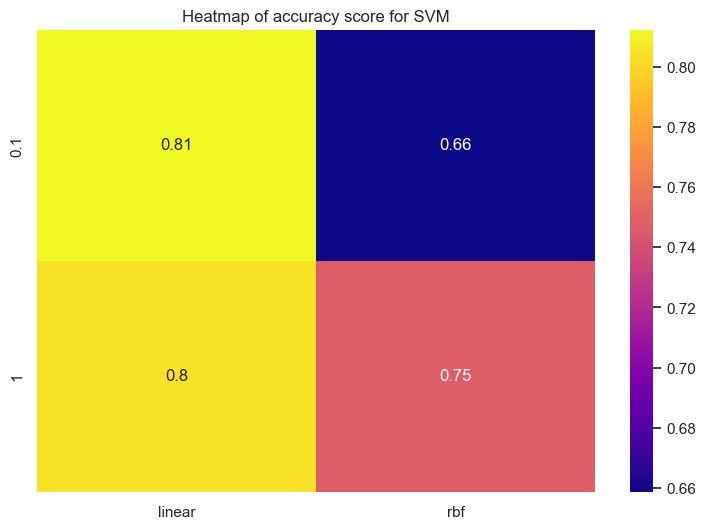

In [29]:
# Heatmap for SVM
accuracy_matrix_svm = np.array(grid_search_svm.cv_results_['mean_test_score']).reshape(len(param_grid_svm['C']), -1)

plt.figure(figsize=(9, 6))
sns.heatmap(accuracy_matrix_svm, cmap="plasma", annot=True,
            xticklabels=param_grid_svm['kernel'],
            yticklabels=param_grid_svm['C'])
plt.title("Heatmap of accuracy score for SVM")
plt.show()

#### (6) LightBGM

In [30]:
!pip install lightgbm
import lightgbm as lgb

In [31]:
train_data=lgb.Dataset(X_train_lr,label=y_train_lr)
test_data=lgb.Dataset(X_test_lr,label=y_test_lr,reference=train_data)

params={"objective":"binary",
        "metric":"mse",
        "boosting_type":"gbdt",
        "num_boost_round":100,
        "learning_rate":0.05,
        "max_depth":6,
        "num_leaves":30,
        "feature_fraction":0.9}

# train model
lgb_model = lgb.train(params,train_data,valid_sets=[test_data])

# make predictions
predictions=lgb_model.predict(X_test_lr,num_iteration=lgb_model.best_iteration)
binary_predictions = [1 if pred>=0.5 else 0 for pred in predictions]

# evalutae the model
lbg_accuracy=accuracy_score(y_test_lr,binary_predictions)
print("Accuracy of LightBMG model is ",lbg_accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

### Section five: summing up and comparing all the results

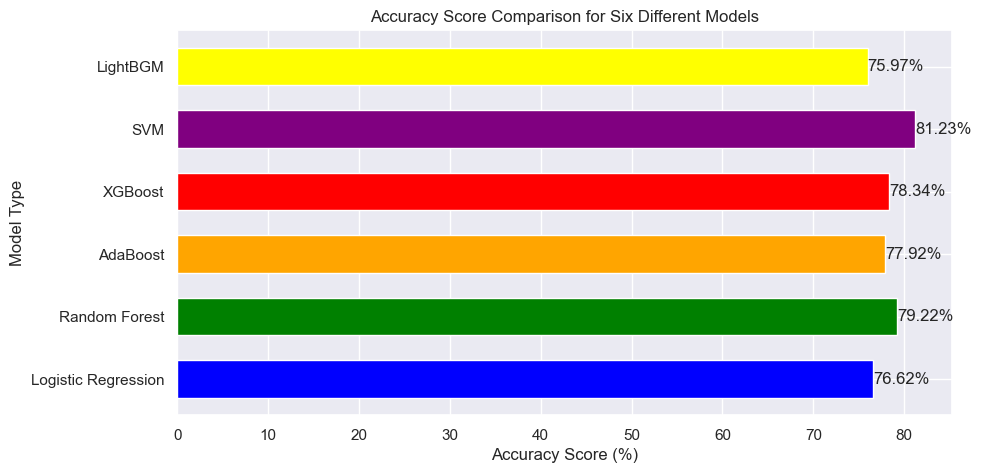

In [34]:
accuracy_data = {
    'Logistic Regression': accuracy_score(y_test_lr, y_estimated_lr),
    'Random Forest': best_accuracy_rf,
    'AdaBoost': best_accuracy_ab,
    'XGBoost': best_accuracy_xgb,
    'SVM': best_accuracy_svm,
    'LightBGM':lbg_accuracy
}

# Convert accuracy scores to percentage format
accuracy_scores_all = [value * 100 for value in accuracy_data.values()]
model_types = list(accuracy_data.keys())

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
hb = ax.barh(y=model_types, width=accuracy_scores_all, height=0.6, color=['blue', 'green', 'orange', 'red', 'purple','yellow'])
ax.bar_label(hb, labels=[f"{i:.2f}%" for i in accuracy_scores_all])
plt.title('Accuracy Score Comparison for Six Different Models')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Model Type')
plt.show()


From all the above tested models, SVM is the clear winner with the higest accuracy score!

Now with our model ready, we can use it to do forecasting on random row from the dataset

In [35]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(svm_model)

# Then we will be loading that saved model
svm_model_from_pickle = pickle.loads(saved_model)
svm_model_from_pickle.fit(X_train_lr, y_train_lr)

# lastly, after loading that model we will use this to make predictions
svm_model_from_pickle.predict(X_test_lr)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

Now we will take the first 20 rows from our test data to check if the model can correctly prdeict whether a patient has diabities (1) or not (0)

In [100]:
random_rows_x = X_test_lr.iloc[0:200,:]
random_rows_y = y_test_lr.iloc[0:200,:]
print(random_rows)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
668     0.639947 -0.777694      -1.190090       0.614265  0.903950  0.225457   
324    -0.547919 -0.317447       0.216174       0.505840 -0.608201  0.472877   
624    -0.547919 -0.448946      -0.693761      -0.469981 -0.608201 -0.240276   
690     1.233880 -0.481821       0.629782      -0.469981 -0.608201 -1.142634   
473     0.936914  0.471547       1.456996      -0.469981 -0.608201 -0.371264   
204     0.639947 -0.613320      -0.031990       0.505840  0.903950  0.763961   
97     -0.844885 -1.665313      -2.017305      -1.012104 -0.176835 -1.753909   
336    -1.141852 -0.153073      -0.031990      -0.469981 -0.608201  0.196348   
568     0.046014  1.063293      -0.031990       0.180566  0.297194 -0.167505   
148     0.342981  0.833170       0.464339      -0.469981 -0.608201  0.181794   

     DiabetesPedigreeFunction       Age  Glucose_Insulin_Interact  \
668                 -0.126471  0.830381           

In [101]:
# let's use SVM model to make predictions and see whether the results will align with observed values
random_rows_y_pred=svm_model_from_pickle.predict(random_rows_x)
random_rows_y_pred=pd.DataFrame({"Predictions":random_rows_y_pred})

random_rows_y=random_rows_y.reset_index(drop=True)

# let's merge random_rows_y (observed values) and random_rows_y_pred (estimated values) and make comparision
estimated_observed=pd.merge(random_rows_y_pred,random_rows_y,left_index=True,right_index=True)

# let's add one more columns to show whether the predictions are correct or nor

def prediction_correct (row):
        if row["Predictions"]==row["Outcome"]:
            return True
        else:
            return False

estimated_observed["Prediction correctness"]=estimated_observed.apply(prediction_correct,axis=1)

# let's check results
print(estimated_observed)  # not bad...
print(f"The rate of making correct predictions is {100* len(estimated_observed[estimated_observed['Prediction correctness'] == True]) / len(estimated_observed)}%")

     Predictions  Outcome  Prediction correctness
0              0        0                    True
1              0        0                    True
2              0        0                    True
3              0        0                    True
4              0        0                    True
..           ...      ...                     ...
149            1        1                    True
150            0        0                    True
151            0        0                    True
152            0        1                   False
153            0        0                    True

[154 rows x 3 columns]
The rate of making correct predictions is 76.62337662337663%


Thus we have successfully built a robust Machine Learning model which can be used to predict diabetes in a pateint using information such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age data

### Section six: Further areas of improvement for the model

Feature Expansion: Investigate the inclusion of additional health-related features in the dataset. For instance, incorporating information about physical activity levels, dietary habits, or genetic predispositions could provide a more comprehensive view of an individual's diabetes risk.

Data Augmentation: Generate synthetic samples to augment the dataset. For example, for individuals with limited representation in the dataset, synthetic variations can be created to ensure a more balanced and diverse training set.

Missing Data Handling: Implement robust strategies for handling missing data. For instance, instead of outright discarding rows with missing values, employ imputation methods such as mean or median replacement, or use advanced techniques like predictive mean matching.

Temporal Dynamics: If available, incorporate temporal aspects into the dataset. For instance, tracking changes in health indicators over time or considering historical trends in diabetes prevalence within specific demographics can enhance the model's temporal sensitivity.

Demographic Features: Explore the inclusion of demographic features such as socioeconomic status, ethnicity, or geographical location. These factors may contribute significantly to diabetes risk and can improve the model's accuracy for specific subgroups.

Nonlinear Relationships: Investigate potential nonlinear relationships between features. Transformations or interactions between features, such as squaring or cross-products, may capture complex dependencies that a linear model might overlook.

Regularization Techniques: Apply regularization techniques to control model complexity and prevent overfitting. For example, using L1 regularization could help in sparse feature selection, focusing on the most informative features.

Stratified Cross-Validation: Implement stratified k-fold cross-validation to ensure that each fold maintains the same distribution of the target variable as the original dataset. This is particularly important when dealing with imbalanced classes.

Domain-Specific Features: Work closely with healthcare professionals to identify and incorporate domain-specific features. For example, including indicators from medical tests, like HbA1c levels or cholesterol profiles, can provide critical health information.

Longitudinal Data: If applicable, consider collecting longitudinal data to observe changes in health indicators over an extended period. This could reveal trends or patterns that are not evident in cross-sectional data.

Feature Scaling: Ensure proper scaling of numerical features. Techniques such as standardization or normalization can prevent certain features from dominating others, improving the model's convergence.

Target Variable Definition: Refine the definition of the target variable, possibly incorporating different stages of diabetes risk (e.g., prediabetes, early-stage diabetes) for a more granular prediction.

By addressing these dataset-specific considerations, the diabetes prediction model can be fine-tuned to better capture the nuances of the underlying health dynamics and enhance its accuracy and generalization capabilities.